In [5]:
import numpy as np
import pandas as pd
import plotly.express as px

In [6]:
df = pd.read_csv('../to_Nao/anime_2021090900_97_v6.csv')
df.head()

,gameId,playId,frameId,point_x,point_y,gameId_playId,Coverage_#1_a,Coverage_#2_a,Coverage_#3_a,Coverage_#4_a,...,Coverage_#2_threat,Coverage_#5_impact,Coverage_#5_threat,Coverage_#1_impact,Coverage_#1_threat,Coverage_#7_impact,Coverage_#7_threat,Coverage_#6_impact,Coverage_#6_threat,blckrs_ttl_impact
0,2021090900,97,1,32.07,13.66,2021090900_97,0.26,0.09,1.29,0.87,...,0.0,4.086562e-15,4.903935e-14,0.0,0.0,0.0,0.0,1.152360e-20,1.382849e-19,0.001247
1,2021090900,97,1,32.07,14.66,2021090900_97,0.26,0.09,1.29,0.87,...,0.0,5.807452e-20,6.463869e-19,0.0,0.0,0.0,0.0,4.635306e-17,5.159235e-16,0.001444
2,2021090900,97,1,32.07,15.66,2021090900_97,0.26,0.09,1.29,0.87,...,0.0,1.956459e-25,2.012051e-24,0.0,0.0,0.0,0.0,8.669367e-14,8.915701e-13,0.000636
3,2021090900,97,1,32.07,16.66,2021090900_97,0.26,0.09,1.29,0.87,...,0.0,6.287796e-31,5.953305e-30,0.0,0.0,0.0,0.0,6.708928e-11,6.352034e-10,0.000121
4,2021090900,97,1,32.07,17.66,2021090900_97,0.26,0.09,1.29,0.87,...,0.0,3.076867e-36,2.673930e-35,0.0,0.0,0.0,0.0,1.911582e-08,1.661247e-07,0.000011


In [ ]:
df['Coverage_#1_impact']

0    52459.0
Name: Coverage_#6_nflId, dtype: float64


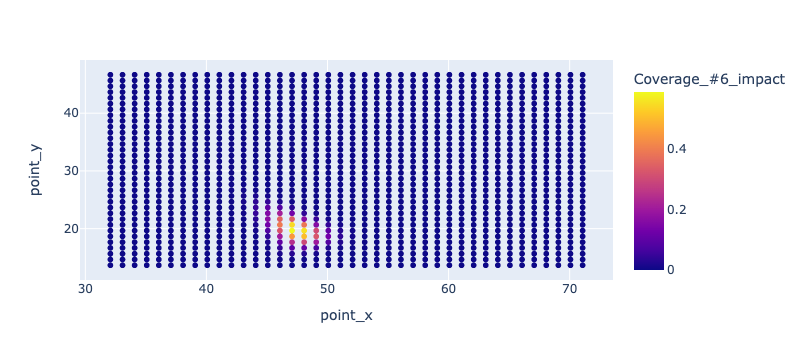

In [33]:
tgt_cvrg = 'Coverage_#6'
print(df['{}_nflId'.format(tgt_cvrg)].head(1))
px.scatter(df[df['frameId']==26], x='point_x', y='point_y', color='{}_impact'.format(tgt_cvrg))

In [245]:
# mean.shape==(2,) and cov.shape==(2,2)

res = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 10000)
res

array([[ 1.8317097 , -1.51770705],
       [-0.21723207, -0.82539841],
       [-0.79068973,  0.43193393],
       ...,
       [-0.75683417,  1.9352168 ],
       [-0.02038487, -0.58870411],
       [-0.08995503,  1.10167587]])

In [246]:
import matplotlib.pylab as plt

In [247]:
#二次元正規分布の確率密度を返す関数
def gaussian(x):
    #分散共分散行列の行列式
    det = np.linalg.det(sigma)
    print(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    print(inv)
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))

#2変数の平均値を指定
mu = np.array([0,0])
#2変数の分散共分散行列を指定
sigma = np.array([[50,0],[0,50]])
gaussian(np.array([[5,2]]))

[[50  0]
 [ 0 50]]
[[0.02 0.  ]
 [0.   0.02]]


array([0.0023818])

[[50  0]
 [ 0 50]]
[[0.02 0.  ]
 [0.   0.02]]


0.00013495590737526913

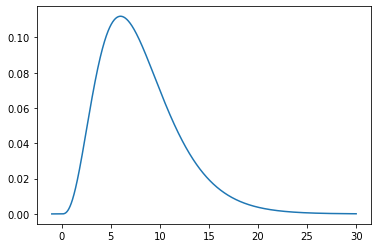

In [248]:
# x方向に影響度を歪ませる
from scipy.stats import chi2
# X
x = np.linspace(-1, 30, 1000)

# 自由度 k=1〜5
k_deg = [1, 2, 3, 4, 5]

# 自由度 n=1〜5 までのグラフを描画
plt.plot(x, chi2.pdf(x, 8))

#左に１０マス、右に４マス
#正規分布影響
coord = [5,2]
impct = gaussian(np.array([coord]))[0]
#プレー方向補正
impct * chi2.pdf(coord[0] + 6, 8)

In [249]:
#case right
passer_coord = [23.59, 27.81]
router_coord = [42.11, 22.42]
coverage_coord = [38.18, 22.74]
direction = {'right': 1, 'left': -1}
direction_val = direction['right']

vec = [router_coord[0] - coverage_coord[0], router_coord[1] - coverage_coord[1]]
impct = gaussian(np.array([vec]))
vec_to_passer = 
impct = impct * chi2.pdf(vec[0] * direction_val + 6, 8)
print(impct)

passer_coord = [23.59, 27.81]
coverage_coord = [42.11, 22.42]
router_coord = [38.18, 22.74]
vec = [router_coord[0] - coverage_coord[0], router_coord[1] - coverage_coord[1]]
impct = gaussian(np.array([vec]))
impct = impct * chi2.pdf(vec[0] * direction_val + 6, 8)
print(impct)


SyntaxError: invalid syntax (<ipython-input-249-3e876a572b35>, line 10)

In [250]:
# case left

passer_coord = [116.43,23.34]
coverage_coord = [100.27,11.08]
router_coord = [96.62,8.48]
direction = {'right': 1, 'left': -1}
direction_val = direction['left']

vec = [router_coord[0] - coverage_coord[0], router_coord[1] - coverage_coord[1]]
impct = gaussian(np.array([vec]))
impct = impct * chi2.pdf(coord[0] * direction_val + 6, 8)
impct

[[50  0]
 [ 0 50]]
[[0.02 0.  ]
 [0.   0.02]]


array([1.64518395e-05])

399.9999999999999
[[0.05 0.  ]
 [0.   0.05]]


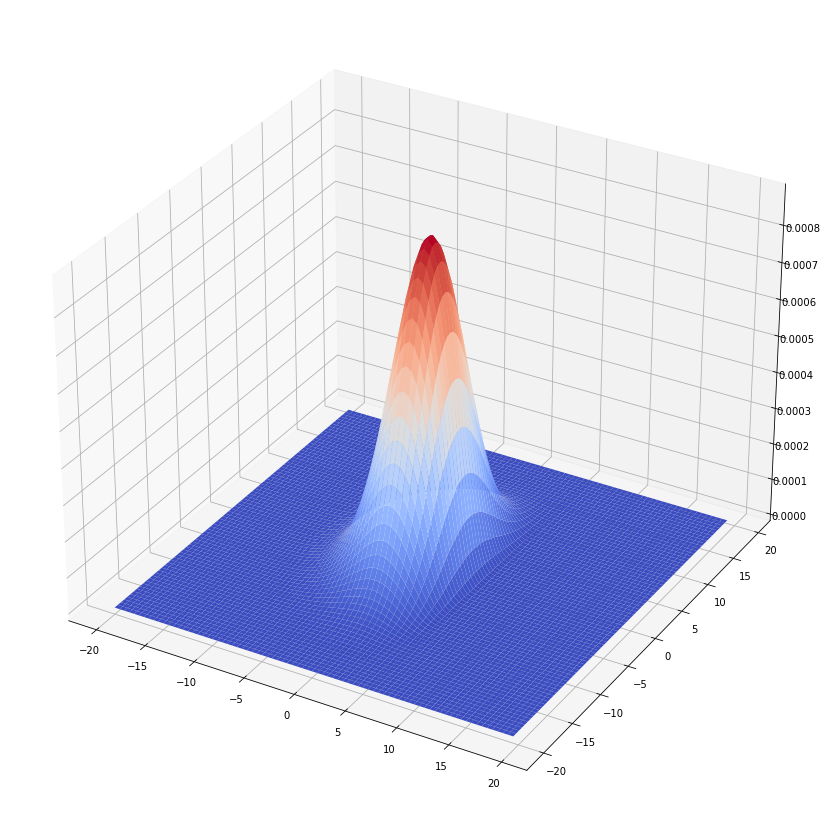

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

#関数に投入するデータを作成
x = y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)

z = np.c_[X.ravel(),Y.ravel()]

#二次元正規分布の確率密度を返す関数
def gaussian(x):
    #分散共分散行列の行列式
    det = np.linalg.det(sigma)
    print(det)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    print(inv)
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))

#2変数の平均値を指定
mu = np.array([0,0])
#2変数の分散共分散行列を指定
sigma = np.array([[20,0],[0,20]])

Z = gaussian(z)
Z = Z * chi2.pdf(X.reshape(6400,) * -1 + 6, 8)
src_Z = Z
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()


In [32]:
X[40]

array([-20. , -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5, -16. ,
       -15.5, -15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5,
       -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,
        -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,
        -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,
         2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,
         7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,
        11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ,  15.5,
        16. ,  16.5,  17. ,  17.5,  18. ,  18.5,  19. ,  19.5])

In [31]:
Y[40]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
Z

array([[1.64021394e-11, 2.68740672e-11, 4.34848141e-11, ...,
        6.94885351e-11, 4.34848141e-11, 2.68740672e-11],
       [2.68740672e-11, 4.40317857e-11, 7.12476457e-11, ...,
        1.13853414e-10, 7.12476457e-11, 4.40317857e-11],
       [4.34848141e-11, 7.12476457e-11, 1.15285513e-10, ...,
        1.84225726e-10, 1.15285513e-10, 7.12476457e-11],
       ...,
       [6.94885351e-11, 1.13853414e-10, 1.84225726e-10, ...,
        2.94391871e-10, 1.84225726e-10, 1.13853414e-10],
       [4.34848141e-11, 7.12476457e-11, 1.15285513e-10, ...,
        1.84225726e-10, 1.15285513e-10, 7.12476457e-11],
       [2.68740672e-11, 4.40317857e-11, 7.12476457e-11, ...,
        1.13853414e-10, 7.12476457e-11, 4.40317857e-11]])

In [38]:
len(src_Z)

6400

In [99]:
df = pd.read_csv('../generated_data/field_df_week1_v3.csv')


In [103]:
dfplay = df[(df['gameId']==2021091200) & (df['playId']==4317)]
cols = ['gameId','playId','frameId','point_x','point_y','Pass_#1_x','Pass_#1_y'] #+ ['ruhsers_ttl_threat_point','blockers_ttl_threat_point','dist_from_passer','field_risk_point']
cols = cols + [col for col in df.columns if 'Rush' in col and ('x' in col or 'y' in col)] + [col for col in df.columns if 'Block' in col and ('x' in col or 'y' in col)]
dfplay = dfplay[cols]
# dfplay[dfplay['frameId'] == 30]
dfplay = dfplay.fillna(0)
dfplay.head()

,gameId,playId,frameId,point_x,point_y,Pass_#1_x,Pass_#1_y,Pass Rush_#1_x,Pass Rush_#2_x,Pass Rush_#3_x,...,Pass Block_#7_x,Pass Block_#8_x,Pass Block_#1_y,Pass Block_#2_y,Pass Block_#3_y,Pass Block_#4_y,Pass Block_#5_y,Pass Block_#6_y,Pass Block_#7_y,Pass Block_#8_y
395123,2021091200,4317,3,68.34,23.89,73.76,30.01,68.34,68.51,68.77,...,0.0,0.0,26.61,31.21,32.68,29.94,28.25,0.0,0.0,0.0
395124,2021091200,4317,3,68.34,24.89,73.76,30.01,68.34,68.51,68.77,...,0.0,0.0,26.61,31.21,32.68,29.94,28.25,0.0,0.0,0.0
395125,2021091200,4317,3,68.34,25.89,73.76,30.01,68.34,68.51,68.77,...,0.0,0.0,26.61,31.21,32.68,29.94,28.25,0.0,0.0,0.0
395126,2021091200,4317,3,68.34,26.89,73.76,30.01,68.34,68.51,68.77,...,0.0,0.0,26.61,31.21,32.68,29.94,28.25,0.0,0.0,0.0
395127,2021091200,4317,3,68.34,27.89,73.76,30.01,68.34,68.51,68.77,...,0.0,0.0,26.61,31.21,32.68,29.94,28.25,0.0,0.0,0.0


In [252]:
def gaussian2d(x, mu, sigma):
    det = np.linalg.det(sigma)
    inv = np.linalg.inv(sigma)
    n = x.ndim
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))
mu = np.array([0,0])
sigma = np.array([[30,0],[0,30]])


-0.5 0.5


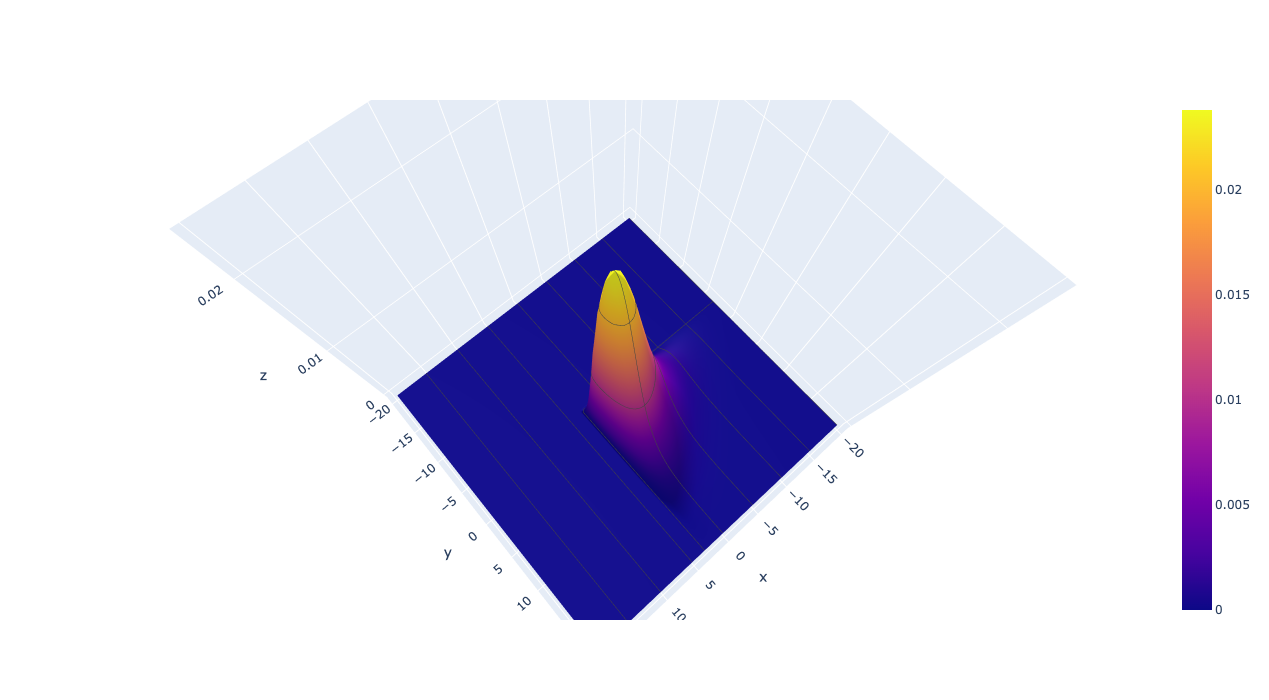

In [253]:
x = np.arange(-20, 20, 0.5)
y = np.arange(-20, 20, 0.5)

passer = [-20, 20]
rusher = [0, 0]
print((passer[0]-rusher[0]) / (abs(passer[0])+abs(passer[1])), (passer[1]-rusher[1]) /(abs(passer[0])+abs(passer[1])))

X, Y = np.meshgrid(x, y)
z = np.c_[X.ravel(),Y.ravel()]
Z = gaussian2d(z, mu, sigma)
# Z = Z * np.sqrt(chi2.pdf(X.reshape(6400,) * (passer[0]-rusher[0]) / (abs(passer[0])+abs(passer[1])) + 4, 6) * chi2.pdf(Y.reshape(6400,) * (passer[1]-rusher[1]) / (abs(passer[0])+abs(passer[1])) + 4, 6)) 
Z = (chi2.pdf(X.reshape(6400,) * 2 * \
                     (passer[0]-rusher[0]) / (abs(passer[0])+abs(passer[1])) + 3, 5) * \
            chi2.pdf(Y.reshape(6400,) * 2 * \
                     (passer[1]-rusher[1]) / (abs(passer[0])+abs(passer[1])) + 3, 5)) 
src_Z = Z
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
# fig = plt.figure(figsize = (15, 15))
# ax = fig.add_subplot(111, projection='3d')

# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
# plt.show()
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=Z,x=X,y=Y, contours = {
        "x": {"show": True},
        "z": {"show": True}
    })])
fig.update_layout(
    autosize=False,
    width=800,
    height=700
)
fig.show()

In [243]:
Z

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.22449542e-08, 5.24844303e-08, 6.51574909e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.40547389e-08, 4.23090426e-08, 5.25251212e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.74311295e-08, 3.40799802e-08, 4.23090426e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

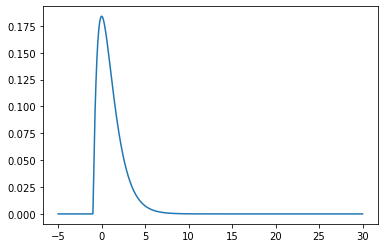

In [239]:
x_chi = np.linspace(-5, 30, 1000)
# 自由度 n=1〜5 までのグラフを描画

def gauss(x, a=1, mu=0, sigma=1.5):
    return a * np.exp(-(x - mu)**2 / (2*sigma**2))

plt.plot(x_chi, chi2.pdf(x_chi * 2 + 2, 4))
# plt.plot(x_chi, chi2.pdf(x_chi, 6) * gauss(x_chi + 4))


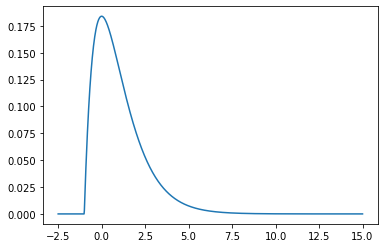

In [240]:
plt.plot(x_chi / 2, chi2.pdf(x_chi + 2, 4))

In [3]:
import numpy as np
import pandas as pd

data = np.random.choice(["a","a b","a c", "b", "c"], 20)
print(data)
# ['b' 'c' 'a' 'c' 'c' 'c' 'c' 'a' 'b' 'a']
labels, uniques = pd.factorize(data)
print(labels)
# [0 1 2 1 1 1 1 2 0 2]
print(uniques)
# ['b' 'c' 'a']

['b' 'b' 'a b' 'a' 'a b' 'a c' 'a c' 'a c' 'a' 'a' 'a b' 'c' 'b' 'a' 'a c'
 'b' 'c' 'a' 'c' 'a c']
[0 0 1 2 1 3 3 3 2 2 1 4 0 2 3 0 4 2 4 3]
['b' 'a b' 'a' 'a c' 'c']


In [4]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt

rng = np.random.default_rng()
df_rugby = pd.read_csv(pm.get_data('rugby.csv'), index_col=0)


In [5]:
df_rugby

,home_team,away_team,home_score,away_score,year
0,Wales,Italy,23,15,2014
1,France,England,26,24,2014
2,Ireland,Scotland,28,6,2014
3,Ireland,Wales,26,3,2014
4,Scotland,England,0,20,2014
5,France,Italy,30,10,2014
6,Wales,France,27,6,2014
7,Italy,Scotland,20,21,2014
8,England,Ireland,13,10,2014
9,Ireland,Italy,46,7,2014


In [14]:
np.rad2deg(np.arctan(1.7320508))

59.99999989158382

In [15]:
passer = [2,2]
router = [5,5]

vec = [3, 3]
np.rad2deg(np.arctan(vec[1]/vec[0]))

45.0

In [2]:
from moviepy.editor import *
 

In [4]:

input_path = "../imgs/TEMP2021090900_2298_brcr_impact.mp4"
output_path = "../imgs/TEMP2021090900_2298_brcr_impact.gif"
clip = VideoFileClip(input_path)
clip = clip.resize(width=1000)
clip.write_gif(output_path, fps=6)
clip.close()

t:   7%|▋         | 2/30 [00:00<00:01, 19.37it/s, now=None]

MoviePy - Building file ../imgs/TEMP2021090900_2298_brcr_impact.gif with imageio.
